In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
data = pd.read_csv(r"C:\Users\murat\Downloads\Medical_insurance.csv")

In [3]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: xlabel='age', ylabel='Count'>

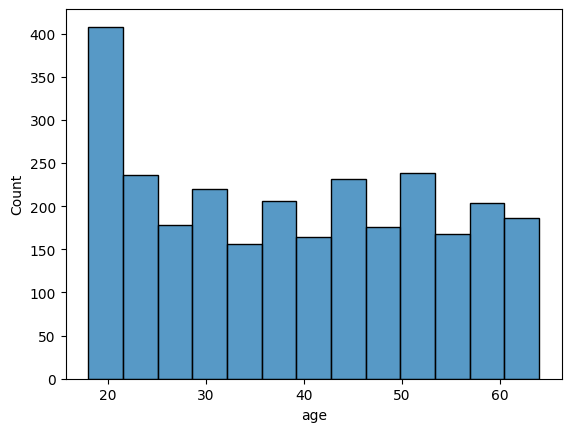

In [5]:
sns.histplot(data['age'])

<Axes: xlabel='sex', ylabel='Count'>

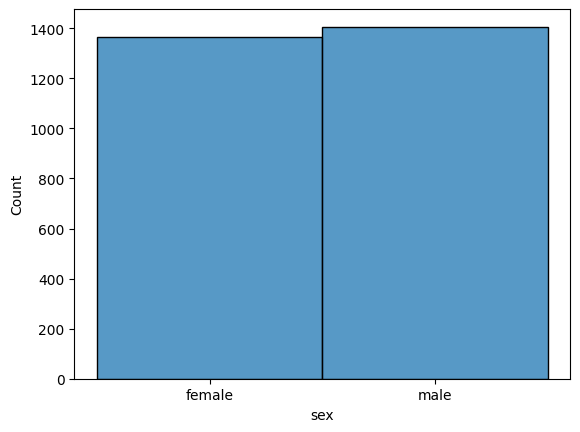

In [6]:
sns.histplot(data['sex'])

<Axes: xlabel='smoker', ylabel='Count'>

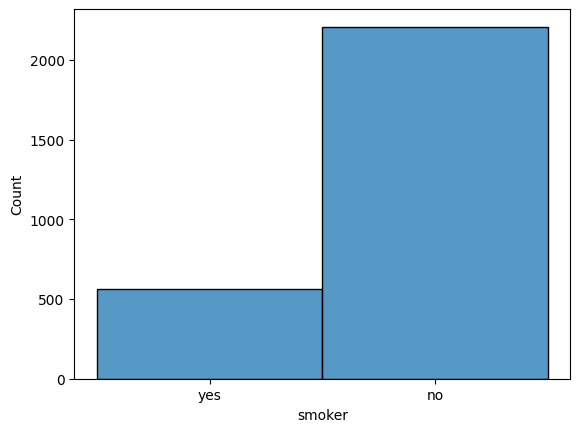

In [7]:
sns.histplot(data['smoker'])

<Axes: xlabel='children', ylabel='Count'>

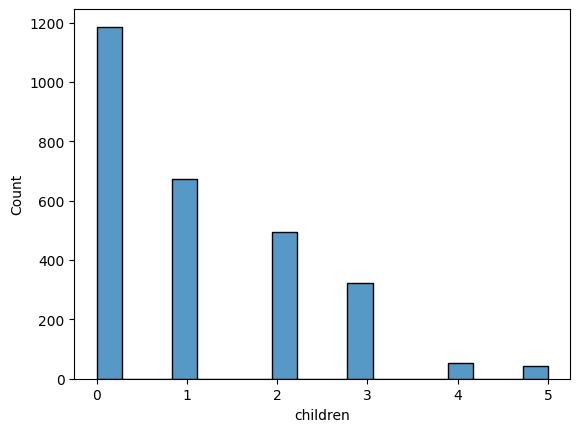

In [8]:
sns.histplot(data['children'])

<Axes: xlabel='region', ylabel='Count'>

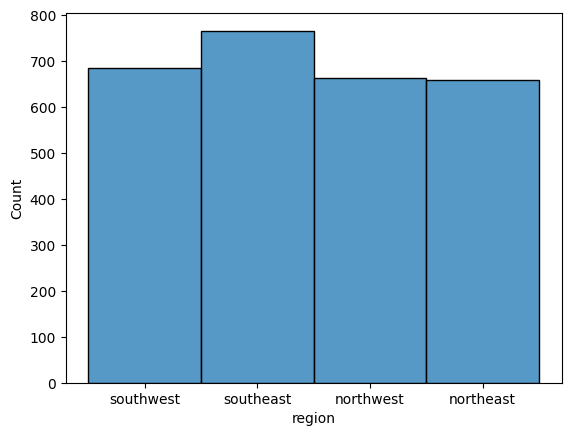

In [9]:
sns.histplot(data['region'])

In [10]:
data.sex = [1 if each =='male' else 0 for each in data.sex]
data.smoker = [1 if each =='yes' else 0 for each in data.smoker]

In [11]:
label_encoder = preprocessing.LabelEncoder()
data['region']= label_encoder.fit_transform(data['region'])

In [12]:
y = data.charges.values

In [13]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
norm = scaler.fit_transform(data)
norm_df = pd.DataFrame(norm,columns=[data.columns])

In [14]:
norm_df

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0.0,0.321227,0.0,1.0,1.000000,0.251611
1,0.000000,1.0,0.479150,0.2,0.0,0.666667,0.009636
2,0.217391,1.0,0.458434,0.6,0.0,0.666667,0.053115
3,0.326087,1.0,0.181464,0.0,0.0,0.333333,0.333010
4,0.304348,1.0,0.347592,0.0,0.0,0.333333,0.043816
...,...,...,...,...,...,...,...
2767,0.630435,0.0,0.789884,0.2,0.0,0.666667,0.118885
2768,0.065217,0.0,0.501480,0.0,0.0,1.000000,0.014339
2769,0.021739,1.0,0.270917,0.2,1.0,0.333333,0.244683
2770,0.108696,1.0,0.074119,0.0,0.0,0.333333,0.326799


In [15]:
def correlation_table(data,target_column):
    data_num = data.select_dtypes(include=['int','float'])
    corr_df = pd.DataFrame(data_num.corrwith(data_num[target_column]),columns=['Correlation']).dropna()
    corr_df['ABS Correlation'] = abs(corr_df['Correlation'])
    corr_df.sort_values(by=['ABS Correlation'], ascending=False, inplace=True)
    print(corr_df)

In [16]:
correlation_table(data, 'charges')

          Correlation  ABS Correlation
charges      1.000000         1.000000
smoker       0.788783         0.788783
age          0.298624         0.298624
bmi          0.199846         0.199846
children     0.066442         0.066442
sex          0.062837         0.062837
region      -0.013530         0.013530


<Axes: >

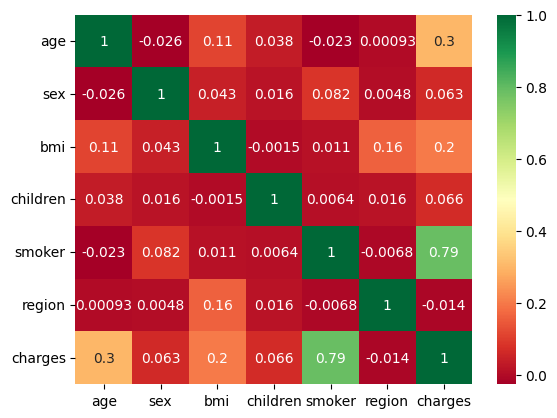

In [17]:
sns.heatmap(data.corr(),cmap="RdYlGn",annot=True)

In [18]:
X = data.drop("charges", axis=1)
y = data['charges']
print(X.shape,y.shape)

(2772, 6) (2772,)


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)
print(X_train.shape, X_test.shape)
print("Train percentage",len(X)*0.80," __ ","Test percentage",len(X)*.20)

(2217, 6) (555, 6)
Train percentage 2217.6  __  Test percentage 554.4


In [20]:
import xgboost as xgb 

model = xgb.XGBRegressor(
    learning_rate=0.1,
    n_estimators=200,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_alpha=10,
    nthread=4)

model.fit(X_train, y_train, 
          eval_set=[(X_train, y_train), (X_test, y_test)], eval_metric='mae')

[0]	validation_0-mae:12048.40769	validation_1-mae:11557.24868
[1]	validation_0-mae:10867.31478	validation_1-mae:10459.31772
[2]	validation_0-mae:9798.24260	validation_1-mae:9446.12344
[3]	validation_0-mae:8842.26339	validation_1-mae:8573.95321
[4]	validation_0-mae:8044.20774	validation_1-mae:7837.68048
[5]	validation_0-mae:7363.03123	validation_1-mae:7235.48804
[6]	validation_0-mae:6783.24937	validation_1-mae:6731.06841
[7]	validation_0-mae:6169.95739	validation_1-mae:6167.53321
[8]	validation_0-mae:5615.77579	validation_1-mae:5656.39786
[9]	validation_0-mae:5222.37113	validation_1-mae:5307.45416
[10]	validation_0-mae:4872.32501	validation_1-mae:5008.10259
[11]	validation_0-mae:4473.37487	validation_1-mae:4649.05741
[12]	validation_0-mae:4110.29121	validation_1-mae:4323.25574
[13]	validation_0-mae:3779.54404	validation_1-mae:4024.46849
[14]	validation_0-mae:3492.11572	validation_1-mae:3757.52074
[15]	validation_0-mae:3236.18913	validation_1-mae:3527.41429
[16]	validation_0-mae:3076.388

d:\python\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[63]	validation_0-mae:1653.36348	validation_1-mae:2157.78215
[64]	validation_0-mae:1646.56229	validation_1-mae:2149.54346
[65]	validation_0-mae:1643.78995	validation_1-mae:2143.52497
[66]	validation_0-mae:1638.38717	validation_1-mae:2139.49923
[67]	validation_0-mae:1633.68341	validation_1-mae:2137.74196
[68]	validation_0-mae:1630.05384	validation_1-mae:2134.92156
[69]	validation_0-mae:1621.73919	validation_1-mae:2128.88958
[70]	validation_0-mae:1618.88293	validation_1-mae:2129.01685
[71]	validation_0-mae:1611.45655	validation_1-mae:2127.55098
[72]	validation_0-mae:1603.52204	validation_1-mae:2119.33500
[73]	validation_0-mae:1594.58935	validation_1-mae:2112.30057
[74]	validation_0-mae:1584.02840	validation_1-mae:2105.48032
[75]	validation_0-mae:1573.81231	validation_1-mae:2096.35362
[76]	validation_0-mae:1569.77114	validation_1-mae:2094.04401
[77]	validation_0-mae:1563.77585	validation_1-mae:2092.73199
[78]	validation_0-mae:1564.52652	validation_1-mae:2097.48777
[79]	validation_0-mae:15

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, nthread=4, num_parallel_tree=None,
             predictor=None, ...)

In [21]:
results = model.evals_result()
epochs = len(results['validation_0']['mae'])
x_axis = range(0, epochs)

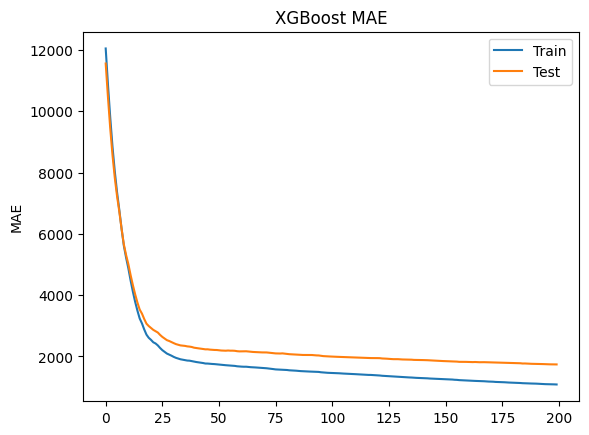

In [22]:

fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mae'], label='Train')
ax.plot(x_axis, results['validation_1']['mae'], label='Test')
ax.legend()
plt.ylabel('MAE')
plt.title('XGBoost MAE')
plt.show()